In [1]:
import time
import random
import matplotlib.pyplot as plt

In [2]:
def addition(a, b, trials=100):
    total_time = 0
    for _ in range(trials):
        start = time.perf_counter_ns()
        c = a + b
        end = time.perf_counter_ns()
        total_time += (end - start)
    return total_time / trials

In [3]:
def schoolbook_mul(a, b, trials=100):
    total_time = 0
    for _ in range(trials):
        start = time.perf_counter_ns()
        c = a * b
        end = time.perf_counter_ns()
        total_time += (end - start)
    return total_time / trials

In [5]:
def number_generate(l):
    a = random.randint(10**(l-1), 10**l - 1)
    b = random.randint(10**(l-1), 10**l - 1)
    return a, b

In [ ]:
lengths = [x for x in range(1, 150)]
add_times, schoolbook_times, karatsuba_times = [], [], []
add, mul, karat = 0, 0, 0
for length in lengths:
    for _ in range(5):  # Average over 5 runs for each length
        a, b = number_generate(length)
        add += addition(a, b)
        mul += schoolbook_mul(a, b)
        # karat += karatsuba_mul(a, b)
    add_times.append(add / 5000)    #average time over 5 trials in microseconds
    schoolbook_times.append(mul / 5000) #average time over 5 trials in microseconds
    # karatsuba_times.append(karat / 5000)    #average time over 5 trials in microseconds

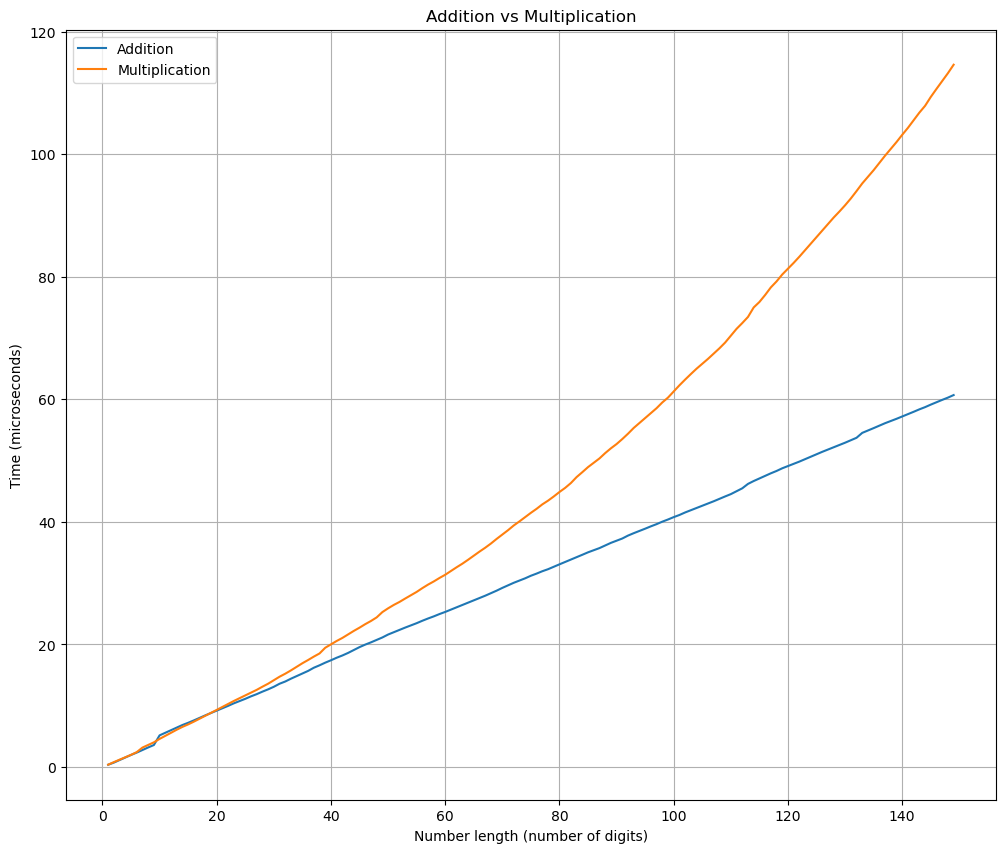

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(lengths, add_times,  label='Addition')
plt.plot(lengths, schoolbook_times,  label='Multiplication')
# plt.plot(lengths, karatsuba_times, label='Karatsuba Mul')
plt.xlabel('Number length (number of digits)')
plt.ylabel('Time (microseconds)')
plt.title('Addition vs Multiplication')
plt.grid()
plt.legend()
plt.show()

#### Karatsuba's multiplication method -> for high speed multiplication
###### slow due to python language and system constraints, so not plotted it.

In [4]:
def timed_karatsuba_mul(x, y):
    if x < 10 or y < 10:
        return x * y
    n = max(len(str(x)), len(str(y)))
    m = n // 2
    high1, low1 = divmod(x, 10 ** m)
    high2, low2 = divmod(y, 10 ** m)
    z0 = timed_karatsuba_mul(low1, low2)
    z1 = timed_karatsuba_mul(low1 + high1, low2 + high2)
    z2 = timed_karatsuba_mul(high1, high2)
    return (z2 * 10 ** (2 * m)) + ((z1 - z2 - z0) * 10 ** m) + z0

def karatsuba_mul(a, b, trials=10):
    total_time = 0
    for _ in range(trials):
        start = time.perf_counter_ns()
        c = timed_karatsuba_mul(a, b)
        end = time.perf_counter_ns()
        total_time += (end - start)
    return total_time / trials
